In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [408]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 2
t = np.arange(0,2000,0.1)
K = 4.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

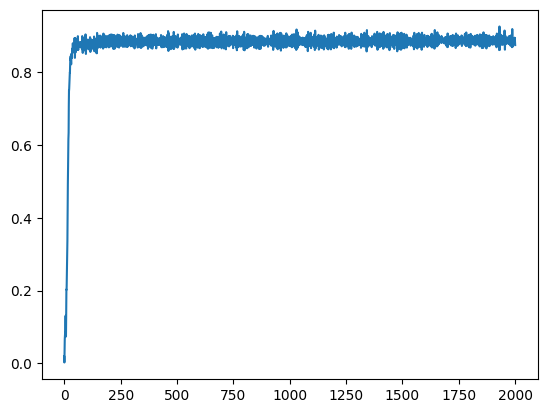

In [409]:
plt.plot (t,rs)

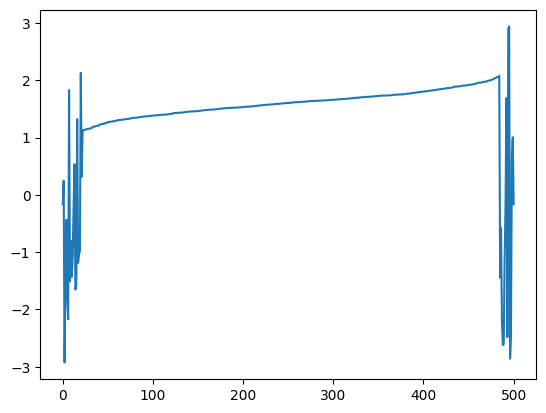

In [410]:
plt.plot(np.c_[new_theta[:,-1].T,new_theta][-10])

In [411]:
pc_theta = np.c_[new_theta[:,-1].T,new_theta]
inter_theta = np.diff(pc_theta)
get_btw_ang= lambda x,N: np.array([np.pi-(abs(x.T[i-1])+abs(x.T[i]))/2 for i in range(N)]).T

In [412]:
inter_theta_ang = np.rad2deg(get_btw_ang(inter_theta,N))
sum_time = 500
inter_theta_ang_c = np.cumsum(inter_theta_ang,axis=0)
inter_avg_angle = (inter_theta_ang_c[sum_time:]-inter_theta_ang_c[:-sum_time])/sum_time

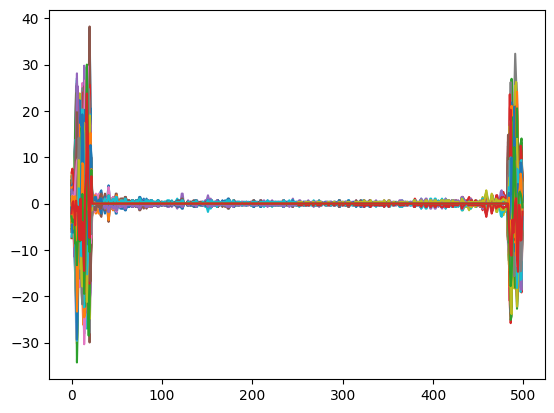

In [413]:
plt.plot(np.diff(inter_avg_angle.T[:,5000::100]));

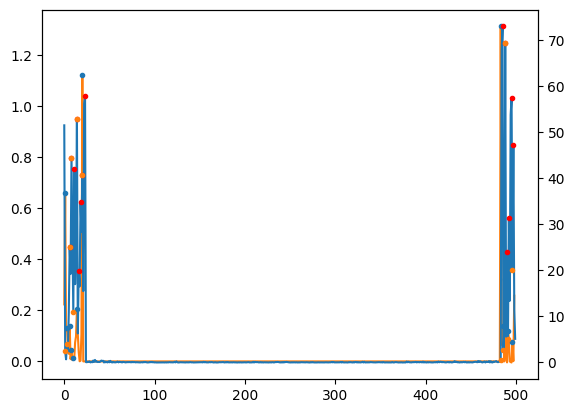

In [429]:
index = -1
diff_dtheta = np.diff(avg_dtheta[index])
peaks2, _ = find_peaks(diff_dtheta, height=0.01)

plt.plot(diff_dtheta,color='tab:orange')
plt.plot(peaks2,diff_dtheta[peaks2],'.')
diff_peaks = np.diff(peaks2)
arg_rdiff_peaks = np.argsort(diff_peaks)

ax = plt.gca()
ax2 = ax.twinx()
temp = inter_avg_angle[index]
diff_iaa = abs(np.diff([temp[-1],*temp])) # inter avg angle
plt.plot(diff_iaa)
peaks, _ = find_peaks(diff_iaa, height=10)
plt.plot(peaks,diff_iaa[peaks],'r.')
plt.plot(peaks2,diff_iaa[peaks2],'.')

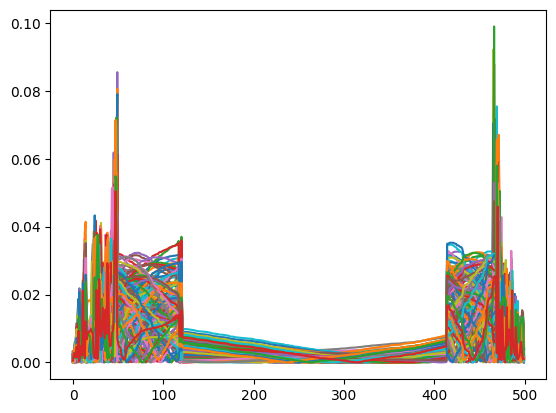

In [404]:
plt.plot(abs(np.diff(avg_dtheta.T[:,5000::100])));


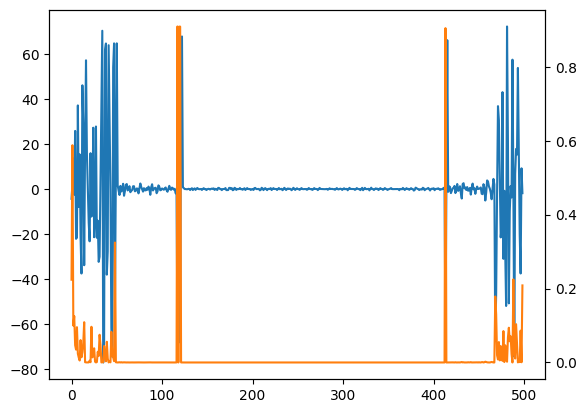

In [383]:
# plt.plot(np.mean(temp[-1000:],axis=0))
plt.plot((np.diff(np.mean(temp[-500:],axis=0))))
ax = plt.gca()
ax2 = ax.twinx()
# ax.secondary_yaxis('right')

plt.plot(abs(np.diff(avg_dtheta[-1])),color ='tab:orange')

In [155]:
np.std(temp[-1000:]-np.mean(temp[-1000:]),axis=0)

array([1.11482633e+00, 1.07262286e+00, 1.05396567e+00, 1.01913836e+00,
       1.08045264e+00, 1.14410911e+00, 9.80434379e-01, 9.86603203e-01,
       1.12500991e+00, 1.36917078e+00, 1.08109636e+00, 1.23052497e+00,
       1.06452561e+00, 9.52582206e-01, 9.90666459e-01, 1.06132202e+00,
       9.31562190e-01, 6.52606090e-01, 9.49651739e-01, 1.03936419e+00,
       1.16144188e+00, 9.89865135e-01, 6.72214099e-01, 5.66517637e-01,
       6.98084489e-01, 8.01719626e-01, 1.06008630e+00, 1.25115336e+00,
       7.41906905e-01, 8.80357668e-01, 1.28368661e+00, 8.82155216e-01,
       9.00881823e-01, 1.04529236e+00, 1.20682109e+00, 1.04515034e+00,
       9.23535476e-01, 8.00257293e-01, 4.00093998e-01, 2.75891348e-01,
       4.52811312e-01, 6.06139851e-01, 4.18326048e-01, 2.60154952e-01,
       2.60153344e-01, 3.69748024e-01, 3.94724813e-01, 2.76820913e-01,
       2.93913102e-01, 4.46363326e-01, 4.76313425e-01, 2.94366769e-01,
       1.70952058e-01, 9.89556404e-02, 3.08554486e-01, 3.08436711e-01,
      

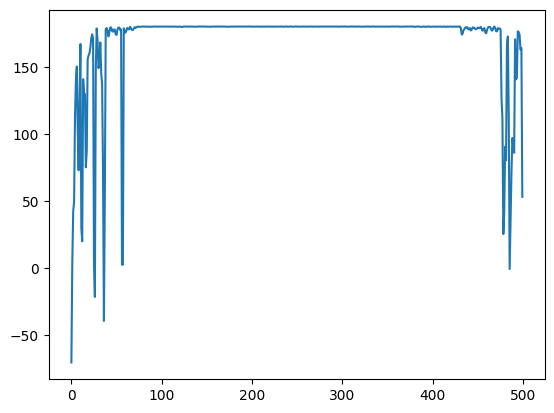

In [159]:
plt.plot(np.rad2deg(temp)[-10])

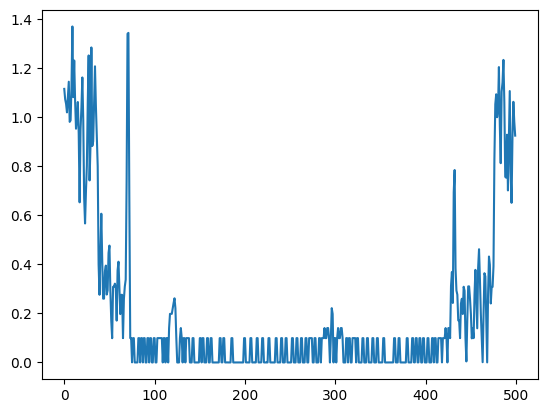

In [157]:
plt.plot(np.std(temp[-1000:],axis=0));

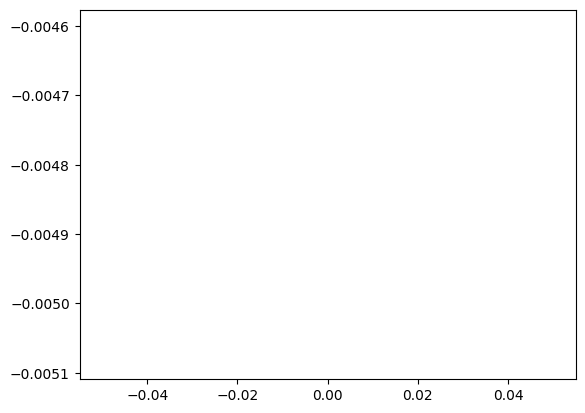

In [106]:
plt.plot(np.mean(np.diff(pc_theta[-500:],axis=0)))

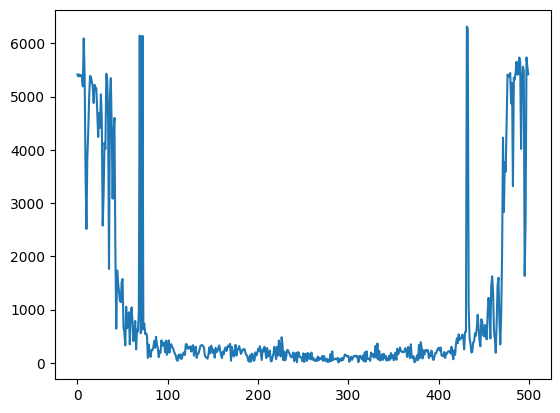

In [174]:
plt.plot(np.mean((temp-temp.mean(axis=0))**2,axis=0))

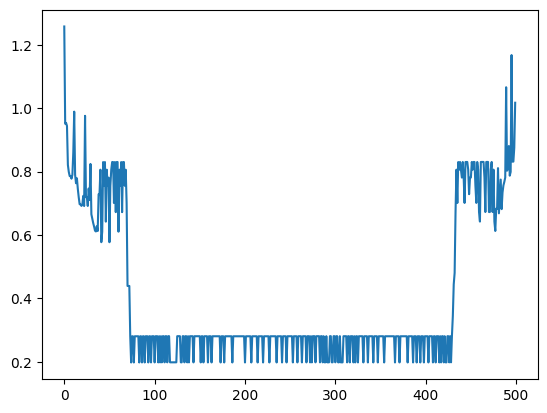

In [142]:
plt.plot(np.std(np.diff(get_btw_ang(pc_theta,N)[-500:],axis=0),axis=0))

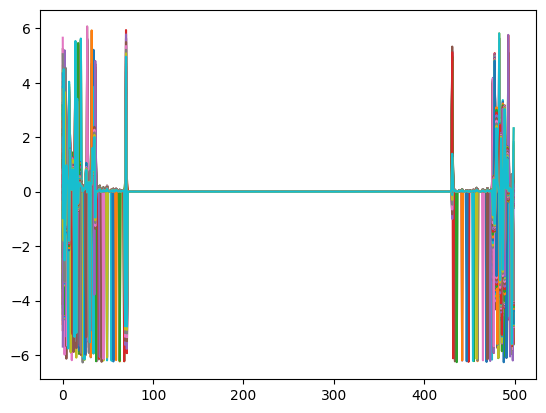

In [59]:
plt.plot(np.diff(pc_theta)[-100:].T);


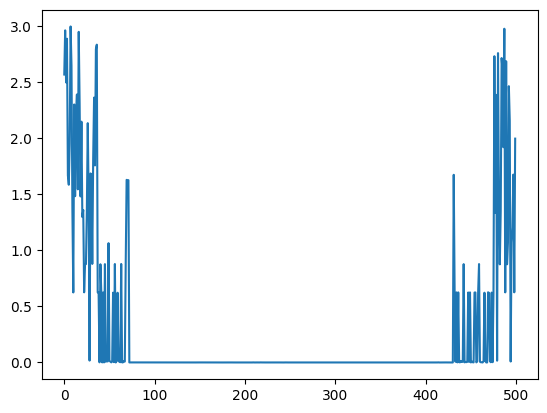

In [45]:
plt.plot(np.std(np.diff(pc_theta)[-100:].T,axis=1))

In [26]:
np.diff([[1,2,3],[4,5,6]])

array([[1, 1],
       [1, 1]])

In [24]:
np.array([[1,2,3],[2,3,4]]).shape

(2, 3)